In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mplfinance as mpf
import statsmodels.api as sm
warnings.filterwarnings("ignore")

from ta import add_all_ta_features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from statsmodels.tsa.stattools import adfuller
from scipy import stats

In [2]:
df1 = pd.read_csv('google_stockD_daily.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
1,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401
2,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132
3,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967
4,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037


In [3]:
df2 = pd.read_csv('google_stockD_weekly.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-16,2.490664,2.716817,2.390042,2.697639,2.694573,1356284704
1,2004-08-23,2.758411,2.826406,2.579581,2.643840,2.640835,1125298143
2,2004-08-30,2.622171,2.627402,2.464263,2.490913,2.488082,794237881
3,2004-09-06,2.515820,2.654052,2.480951,2.623417,2.620435,474118476
4,2004-09-13,2.655795,2.926282,2.651561,2.926282,2.922956,967075300


In [4]:
df3 = pd.read_csv('google_stockD_monthly.csv')
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-01,2.557912,3.362895,2.464263,3.227901,3.224232,4270113667
1,2004-10-01,3.257789,4.980083,3.210466,4.748203,4.742805,10321258145
2,2004-11-01,4.820681,5.021179,4.017691,4.532511,4.527359,11145383635
3,2004-12-01,4.531764,4.978340,4.196022,4.801752,4.796294,5835483147
4,2005-01-01,4.916571,5.113334,4.390792,4.872238,4.866700,8237356337


#### Merging data

In [5]:
#Merging all 3 datasets

# Read the tables from their respective files
df1 = pd.read_csv("google_stockD_daily.csv")
df2 = pd.read_csv("google_stockD_weekly.csv")
df3 = pd.read_csv("google_stockD_monthly.csv")

# Merge the tables based on the "Date" column
df = pd.concat([df1,df2,df3], ignore_index=True, sort=False)

# Print the merged table without the "Unnamed: 0" column
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512
1  2004-08-26  2.613952  2.688672  2.606729  2.687676   2.684621  142572401
2  2004-08-27  2.692408  2.705360  2.632383  2.643840   2.640835  124826132
3  2004-08-30  2.622171  2.627402  2.540727  2.540727   2.537839  104429967
4  2004-08-31  2.547950  2.583068  2.544463  2.549693   2.546795   98825037


#### Information About the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6265 non-null   object 
 1   Open       6265 non-null   float64
 2   High       6265 non-null   float64
 3   Low        6265 non-null   float64
 4   Close      6265 non-null   float64
 5   Adj Close  6265 non-null   float64
 6   Volume     6265 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.7+ KB


In [7]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
#Print the shape of Dataframe
rows, columns = df.shape
print(f"\nThe Dataset has {rows} rows and {columns} columns.")


The Dataset has 6265 rows and 7 columns.


In [9]:
#Check for Null Values
print('Null Values in Dataframe:\n', df.isnull().sum())

Null Values in Dataframe:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Finding Unique values
df.nunique()

Date         5171
Open         4838
High         4843
Low          4878
Close        4894
Adj Close    4896
Volume       6147
dtype: int64

#### Trend over time

#### Closing Price

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
1,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401
2,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132
3,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967
4,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037
...,...,...,...,...,...,...,...
6260,2024-03-01,139.610001,153.199997,131.550003,152.259995,152.086929,507013200
6261,2024-04-01,151.830002,176.419998,151.080994,164.639999,164.452866,486888300
6262,2024-05-01,166.179993,179.949997,164.899994,173.960007,173.762268,391987600
6263,2024-06-01,173.880005,182.511993,172.449997,180.259995,180.055099,264028500


In [12]:
df.shape

(6265, 7)

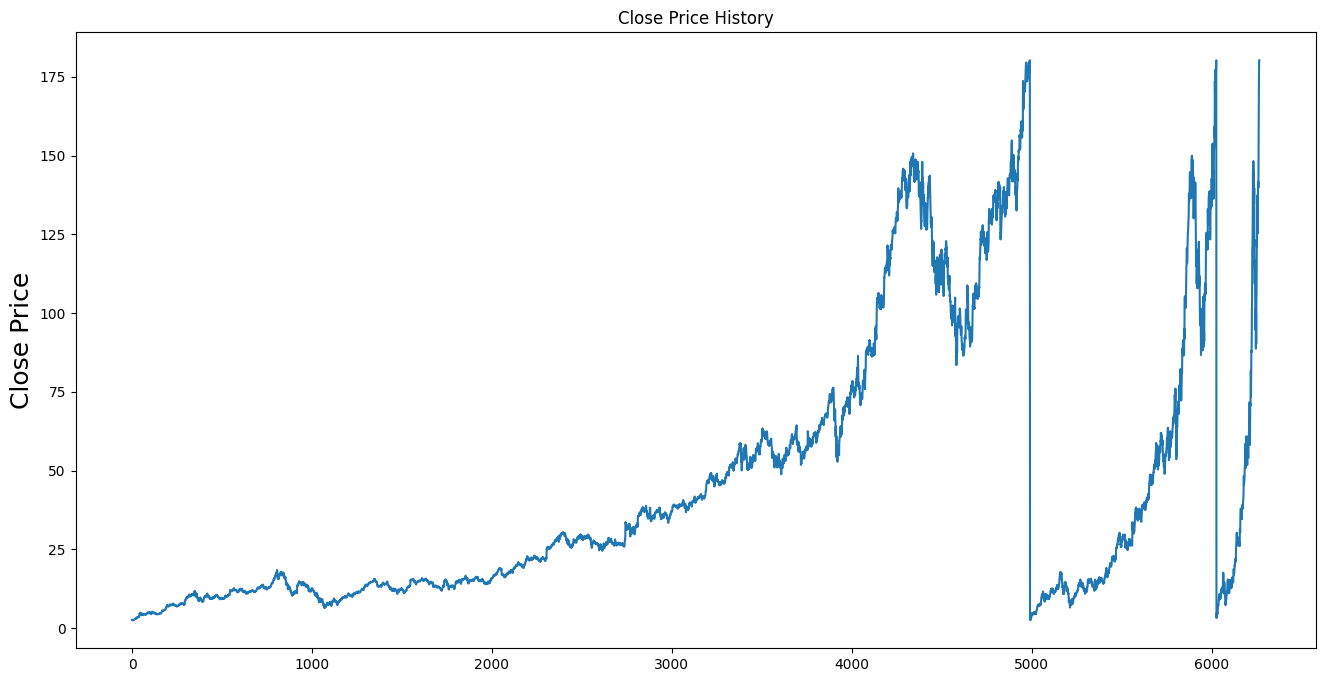

In [13]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel(None)
plt.ylabel('Close Price', fontsize=18)
plt.show()


#### Volume of Sales

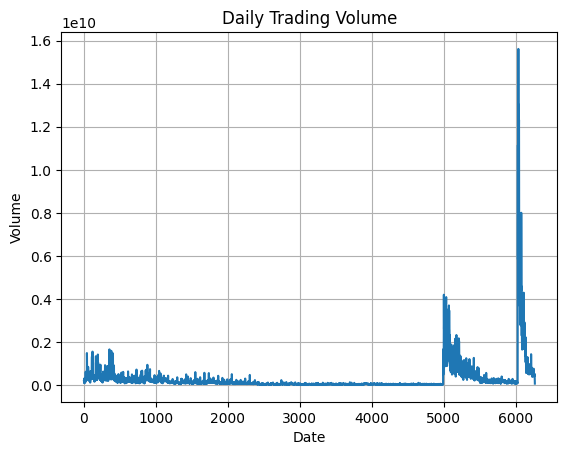

In [14]:
# Plotting the 'Volume' column from df
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Daily Trading Volume')

plt.grid(True)
plt.show()

#### Moving average